<a href="https://colab.research.google.com/github/Brena-Pacheco/Ciencia-da-Computa-o/blob/main/Campo_minado1_6b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio da semana - Projeto de Reconstrução: Jogo Campo Minado em Python (Versão Básica)
Desenvolvedores: Brena Pacheco

## História do Jogo
***
 <p>**Campo Minado** ou **Minesweeper** em inglês é um jogo de computador clássico que se tornou amplamente popular quando foi incluído no sistema operacional Windows. O jogo foi desenvolvido pela primeira vez em 1989 por Robert Donner e Curt Johnson e lançado oficialmente como parte do **Microsoft Entertainment Pack para Windows 3.1** em 1990.

O principal objetivo da inclusão do Campo Minado no Windows era familiarizar os usuários com o uso do mouse, especialmente no que se refere ao clique com o botão direito, que era uma novidade para muitos na época. Devido à sua simplicidade e à facilidade de acesso, o jogo se tornou um dos passatempos mais populares entre os usuários de computador.</p>


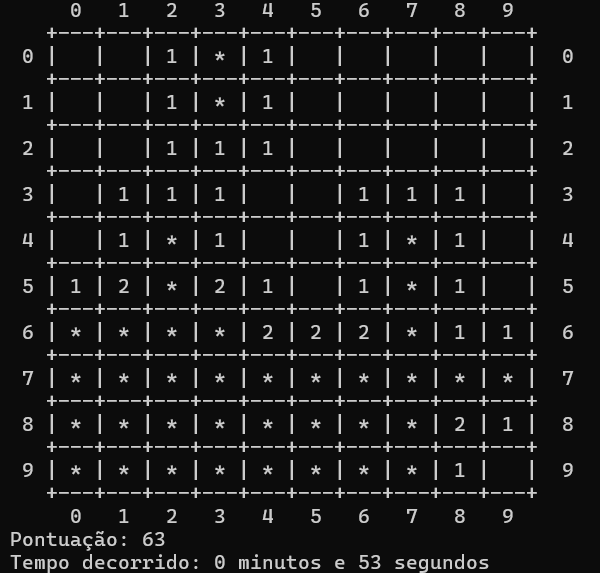



## Funcionalidades

1. **Escolha de Dificuldade**: O jogador pode escolher entre três níveis de dificuldade:
    - **Fácil**: Tabuleiro 10x10 com 10 minas.
    - **Médio**: Tabuleiro 20x20 com 40 minas.
    - **Difícil**: Tabuleiro 30x30 com 90 minas.

2. **Revelação de Células**: O jogador pode selecionar uma célula do tabuleiro para revelar. Se a célula contiver uma mina, o jogo termina. Caso contrário, a célula exibirá um número indicando quantas minas estão nas células adjacentes.

3. **Pontuação e Tempo**: O jogo mantém um registro da pontuação do jogador, que aumenta a cada célula segura revelada. Também é exibido o tempo decorrido desde o início da partida.

4. **Fim de Jogo**: Se o jogador clicar em uma mina, o jogo termina e todas as minas são reveladas no tabuleiro. A pontuação final e o tempo decorrido são mostrados.

5. **Verificação de Vitória**: O jogo verifica se o jogador venceu a partida ao revelar todas as células seguras. Em caso de vitória, uma mensagem de congratulação é exibida, junto com a pontuação final e o tempo decorrido.

6. **Reiniciar Jogo**: Após o término de uma partida, o jogador pode optar por iniciar uma nova partida ou sair do jogo.


## Comandos e Operações

- **Escolher Dificuldade**: Após iniciar o jogo, o jogador é solicitado a escolher o nível de dificuldade digitando `1`, `2` ou `3` no teclado:
    - `1` - Fácil
    - `2` - Médio
    - `3` - Difícil

- **Clicar em uma Célula**: Durante o jogo, o jogador pode clicar em uma célula digitando os números correspondentes à linha e à coluna, separados por um espaço. Por exemplo, para clicar na célula na linha 2 e coluna 3, o jogador deve digitar:
    ```
    2 3
    ```

- **Revelar Células Vizinhas**: Se o jogador clicar em uma célula que não tenha minas vizinhas (mostrada como "0"), todas as células vizinhas seguras são reveladas automaticamente.

- **Fim de Jogo**: Se o jogador clicar em uma célula contendo uma mina, o jogo terminará imediatamente. Uma mensagem será exibida, mostrando a pontuação final e o tempo decorrido. Em seguida, o jogador pode optar por jogar novamente ou sair.

- **Verificar Vitória**: O jogo verificará automaticamente se o jogador revelou todas as células seguras. Se isso ocorrer, uma mensagem de vitória será exibida.

- **Reiniciar ou Sair do Jogo**: Após o término de uma partida, o jogador será solicitado a decidir se deseja jogar novamente (`S`) ou sair (`N`).

https://www.promath.com.br/2010/11/a-logica-do-campo-minado/

## Código



In [ ]:
import random
import sys
import time

# A classe CampoMinadoCLI define o jogo Campo Minado na interface de linha de comando
class CampoMinadoCLI:
    def __init__(self, linhas, colunas, minas):
        # Inicializa o tabuleiro com as dimensões e número de minas
        self.linhas = linhas
        self.colunas = colunas
        self.minas = minas
        self.pontuacao = 0
        self.posicoes_minadas = set()  # Armazena as posições das minas
        # Cria o tabuleiro inicial e o tabuleiro visível ao jogador
        self.tabuleiro = [[' ' for _ in range(colunas)] for _ in range(linhas)]
        self.tabuleiro_visivel = [['*' for _ in range(colunas)] for _ in range(linhas)]
        # Configura o tabuleiro, coloca as minas e calcula as células vizinhas
        self.criar_tabuleiro()
        self.colocar_minasc()
        self.calcular_minass_vizinhas()
        self.tempo_inicial = None  # Variável para armazenar o tempo de início do jogo

    def criar_tabuleiro(self):
        # Inicializa o tabuleiro com células vazias representadas por '0'
        for linha in range(self.linhas):
            for coluna in range(self.colunas):
                self.tabuleiro[linha][coluna] = 0

    def colocar_minasc(self):
        # Coloca minas aleatoriamente no tabuleiro
        while len(self.posicoes_minadas) < self.minas:
            linha = random.randint(0, self.linhas - 1)
            coluna = random.randint(0, self.colunas - 1)
            # Garante que a mesma posição não será usada duas vezes para uma mina
            if (linha, coluna) not in self.posicoes_minadas:
                self.posicoes_minadas.add((linha, coluna))
                self.tabuleiro[linha][coluna] = -1  # Representa uma mina com '-1'

    def calcular_minass_vizinhas(self):
        # Calcula quantas minas estão nas células vizinhas para cada célula do tabuleiro
        for linha in range(self.linhas):
            for coluna in range(self.colunas):
                if self.tabuleiro[linha][coluna] == -1:
                    continue
                contagem_minasc = 0
                # Percorre as células vizinhas e conta quantas delas são minas
                for i in range(max(0, linha - 1), min(self.linhas, linha + 2)):
                    for j in range(max(0, coluna - 1), min(self.colunas, coluna + 2)):
                        if self.tabuleiro[i][j] == -1:
                            contagem_minasc += 1
                self.tabuleiro[linha][coluna] = contagem_minasc  # Armazena a contagem no tabuleiro

    def imprimir_tabuleiro(self):
        # Imprime o tabuleiro visível ao jogador, a pontuação e o tempo decorrido
        print("    ", end="")
        for coluna in range(self.colunas):
            print(f"{coluna:2} ", end=" ")  # Imprime números das colunas
        print()

        print("   +" + "---+" * self.colunas)  # Imprime linha superior do tabuleiro

        for linha in range(self.linhas):
            print(f"{linha:2} |", end="")  # Imprime número da linha
            for celula in self.tabuleiro_visivel[linha]:
                print(f" {celula} |", end="")
            print(f" {linha:2}")  # Imprime número da linha do lado direito
            print("   +" + "---+" * self.colunas)

        # Imprime números das colunas na parte inferior
        print("    ", end="")
        for coluna in range(self.colunas):
            print(f"{coluna:2} ", end=" ")

        # Imprime pontuação e tempo decorrido
        print(f"\nPontuação: {self.pontuacao}")
        if self.tempo_inicial:
            tempo_decorrido = int(time.time() - self.tempo_inicial)
            minutos = tempo_decorrido // 60
            segundos = tempo_decorrido % 60
            print(f"Tempo decorrido: {minutos} minutos e {segundos} segundos\n")

    def clicar(self, linha, coluna):
        # Ação de clicar em uma célula; verifica se é mina ou não
        if self.tabuleiro[linha][coluna] == -1:
            self.tabuleiro_visivel[linha][coluna] = 'X'  # Marca a mina no tabuleiro visível
            self.fim_de_jogo()  # Termina o jogo se for uma mina
        else:
            self.revelar_celula(linha, coluna)  # Revela a célula e possivelmente outras vizinhas
            if self.checar_vitoria():  # Verifica se o jogador venceu o jogo
                self.mostrar_mensagem_vitoria()

    def revelar_celula(self, linha, coluna):
        # Revela a célula clicada, atualizando a pontuação e possivelmente revelando células vizinhas
        if self.tabuleiro_visivel[linha][coluna] != '*':
            return  # Evita revelar a mesma célula mais de uma vez
        if self.tabuleiro[linha][coluna] == 0:
            self.tabuleiro_visivel[linha][coluna] = ' '  # Marca célula vazia
            self.pontuacao += 1
            self.revelar_celulas_vizinhas(linha, coluna)  # Revela as células vizinhas seguras
        else:
            self.tabuleiro_visivel[linha][coluna] = str(self.tabuleiro[linha][coluna])  # Exibe o número de minas vizinhas
            self.pontuacao += 1

    def revelar_celulas_vizinhas(self, linha, coluna):
        # Revela recursivamente células vizinhas seguras (que não têm minas)
        for i in range(max(0, linha - 1), min(self.linhas, linha + 2)):
            for j in range(max(0, coluna - 1), min(self.colunas, coluna + 2)):
                if self.tabuleiro_visivel[i][j] == '*':
                    self.revelar_celula(i, j)

    def fim_de_jogo(self):
        # Ação de fim de jogo ao clicar em uma mina
        for linha, coluna in self.posicoes_minadas:
            self.tabuleiro_visivel[linha][coluna] = 'X'  # Revela todas as minas
        self.imprimir_tabuleiro()
        print("\n\nVocê encontrou uma mina! Fim de jogo.\n")
        tempo_decorrido = int(time.time() - self.tempo_inicial)
        minutos = tempo_decorrido // 60
        segundos = tempo_decorrido % 60
        print(f"\nPontuação final: {self.pontuacao} pontos")
        print(f"Tempo decorrido: {minutos} minutos e {segundos} segundos\n")
        self.perguntar_para_continuar()  # Pergunta se o jogador quer continuar

    def mostrar_mensagem_vitoria(self):
        # Exibe a mensagem de vitória quando todas as células seguras são reveladas
        self.imprimir_tabuleiro()
        print("\n\nParabéns, você venceu!")
        tempo_decorrido = int(time.time() - self.tempo_inicial)
        minutos = tempo_decorrido // 60
        segundos = tempo_decorrido % 60
        print(f"\nPontuação final: {self.pontuacao}")
        print(f"Tempo decorrido: {minutos} minutos e {segundos} segundos\n")
        self.perguntar_para_continuar()

    def checar_vitoria(self):
        # Verifica se todas as células seguras (sem minas) foram reveladas
        for linha in range(self.linhas):
            for coluna in range(self.colunas):
                if self.tabuleiro[linha][coluna] != -1 and self.tabuleiro_visivel[linha][coluna] == '*':
                    return False  # Se ainda houver células seguras não reveladas, não há vitória
        return True  # Todas as células seguras foram reveladas

    def perguntar_para_continuar(self):
        # Pergunta ao jogador se deseja jogar novamente ou sair do jogo
        while True:
            escolha = input("Deseja jogar novamente? (S/N): ").strip().upper()
            if escolha == 'S':
                self.escolher_dificuldade()  # Reinicia o jogo com uma nova dificuldade
                break
            elif escolha == 'N':
                print("Obrigado por jogar!\n")
                sys.exit()  # Encerra o programa
            else:
                print("Entrada inválida. Digite 'S' para sim ou 'N' para não.\n")

    def reiniciar_jogo(self, linhas, colunas, minas):
        # Reinicia o jogo com novas configurações de tabuleiro
        self.posicoes_minadas.clear()
        self.linhas = linhas
        self.colunas = colunas
        self.minas = minas
        self.tabuleiro = [[' ' for _ in range(colunas)] for _ in range(linhas)]
        self.tabuleiro_visivel = [['*' for _ in range(colunas)] for _ in range(linhas)]
        self.pontuacao = 0
        self.tempo_inicial = time.time()
        self.criar_tabuleiro()
        self.colocar_minasc()
        self.calcular_minass_vizinhas()
        self.jogar()

    def jogar(self):
        # Loop principal do jogo, onde o jogador faz suas jogadas
        self.tempo_inicial = time.time()
        while True:
            self.imprimir_tabuleiro()
            try:
                linha, coluna = map(int, input("Digite a linha e coluna (separados por espaço): ").split())
                if 0 <= linha < self.linhas and 0 <= coluna < self.colunas:
                    self.clicar(linha, coluna)  # Realiza a jogada
                else:
                    print("\nEntrada inválida. Tente novamente.")
            except ValueError:
                print("\nEntrada inválida. Por favor, insira números inteiros.")

    def escolher_dificuldade(self):
        # Permite ao jogador escolher o nível de dificuldade (fácil, médio, difícil)
        while True:
            dificuldade = input("\nEscolha o nível de dificuldade:\n1 - Fácil\n2 - Médio\n3 - Difícil\n\n")
            if dificuldade == '1':
                self.reiniciar_jogo(10, 10, 10)  # Fácil: 10x10 tabuleiro com 10 minas
                break
            elif dificuldade == '2':
                self.reiniciar_jogo(20, 20, 40)  # Médio: 20x20 tabuleiro com 40 minas
                break
            elif dificuldade == '3':
                self.reiniciar_jogo(30, 30, 90)  # Difícil: 30x30 tabuleiro com 90 minas
                break
            else:
                print("Dificuldade inválida!\nEscolha entre Fácil(1), Médio(2) ou Difícil(3).")

# Inicia o jogo ao executar o script
if __name__ == "__main__":
    jogo = CampoMinadoCLI(10, 10, 10)  # Inicia o jogo com a configuração padrão
    jogo.escolher_dificuldade()
